Q.1) Create log annual total asset growth

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Apple_Total_Assets.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    25 non-null     object
 1   datadate  25 non-null     object
 2   fyear     25 non-null     int64 
 3   at        25 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 928.0+ bytes


In [ ]:
data.head(40)

,ticker,datadate,fyear,at,asset_growth,log_asset_growth
1,AAPL,2000-09-30,2000,6803,0.318155,0.276233
2,AAPL,2001-09-30,2001,6021,-0.114949,-0.122110
3,AAPL,2002-09-30,2002,6298,0.046006,0.044979
4,AAPL,2003-09-30,2003,6815,0.082090,0.078894
5,AAPL,2004-09-30,2004,8050,0.181218,0.166546
6,AAPL,2005-09-30,2005,11551,0.434907,0.361100
7,AAPL,2006-09-30,2006,17205,0.489481,0.398428
8,AAPL,2007-09-30,2007,25347,0.473235,0.387460
9,AAPL,2008-09-30,2008,39572,0.561210,0.445461
10,AAPL,2009-09-30,2009,47501,0.200369,0.182629


<ipython-input-44-0f6dcd2f5b9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_asset_growth'] = np.log(1 + data['asset_growth'])


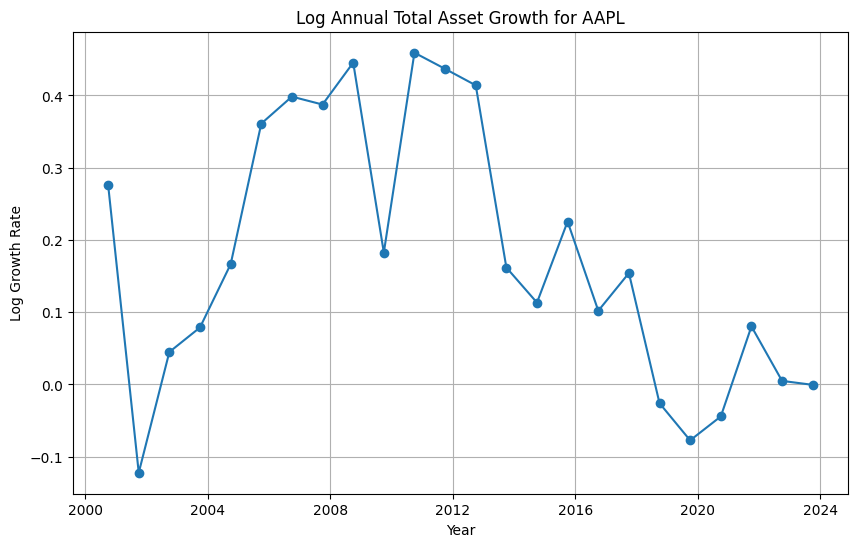

In [ ]:
data['datadate'] = pd.to_datetime(data['datadate'])
data.sort_values(by='datadate', inplace=True)

data['asset_growth'] = data['at'].pct_change()
data = data.iloc[1:]

data['log_asset_growth'] = np.log(1 + data['asset_growth'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['datadate'], data['log_asset_growth'], marker='o', linestyle='-')
plt.title('Log Annual Total Asset Growth for AAPL')
plt.xlabel('Year')
plt.ylabel('Log Growth Rate')
plt.grid(True)
plt.show()

Q.2) Using the Corpus, clean the text data

In [ ]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
### Implemented lemmatization with Parallel processing and Caching. 4 hrs --> 22 sec
'''
Lemmatization often involves redundant computations for the same words.
You can cache or store the lemmatized forms of words in a dictionary or database
to avoid redundant computations for words that have already been lemmatized.
'''

from multiprocessing import Pool

lemma = WordNetLemmatizer()
lemma_cache = {}

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatized_tokens = []
    for token in tokens:
        if token in lemma_cache:
            lemmatized_tokens.append(lemma_cache[token])
        else:
            lemmatized_word = lemma.lemmatize(token, pos='v')
            lemma_cache[token] = lemmatized_word
            lemmatized_tokens.append(lemmatized_word)

    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text

def process_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        cleaned_text = clean_text(text)
        cleaned_file_path = os.path.join(cleaned_folder, os.path.basename(file_path).replace(".txt", "_clean.txt"))
        with open(cleaned_file_path, 'w') as cleaned_file:
            cleaned_file.write(cleaned_text)

if __name__ == '__main__':
    reports_folder = "/content/drive/MyDrive/annual_reports_apple"
    cleaned_folder = "/content/drive/MyDrive/AppleData_cleaned_lemma"

    if not os.path.exists(cleaned_folder):
        os.makedirs(cleaned_folder)

    file_paths = [os.path.join(reports_folder, file_name) for file_name in os.listdir(reports_folder) if file_name.endswith(".txt")]
    with Pool() as pool:
        pool.map(process_file, file_paths)

    print("Cleaning completed.\nSaved successfully in Drive!")

Cleaning completed.
Saved successfully in Drive!


In [ ]:
### Cleaning done using Porter Stemming. This is mentioned in the problem statement. Lemmatization implemented to get better results
## 6sec

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) # ^ denotes negation. so it will replace everything other than letters with empty string

    text = text.lower()

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) # stop words. can also used self-defined or any library
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

reports_folder = "/content/drive/MyDrive/annual_reports_apple"

cleaned_folder = "/content/drive/MyDrive/AppleData_cleaned_stem"
if not os.path.exists(cleaned_folder):
    os.makedirs(cleaned_folder)

# Loop through each file in the reports folder
for file_name in os.listdir(reports_folder):
    if file_name.endswith(".txt"):
        with open(os.path.join(reports_folder, file_name), 'r') as file:
            text = file.read()

        # call func to clean -> tokenize -> stemm -> return
        cleaned_text = clean_text(text)

        # save cleaned file
        cleaned_file_path = os.path.join(cleaned_folder, file_name.replace(".txt", "_clean.txt"))
        with open(cleaned_file_path, 'w') as cleaned_file:
            cleaned_file.write(cleaned_text)

print("Cleaning completed.\nSaved successfully in Drive!")

Cleaning completed.
Saved successfully in Drive!


Q.3) Create unigrams, bigrams, and trigrams.

In [ ]:
from collections import Counter
from nltk.util import ngrams
import seaborn as sns

In [ ]:
cleaned_folder = "/content/drive/MyDrive/AppleData_cleaned_stem"

In [ ]:
unigrams = []
bigrams = []
trigrams = []

for file_name in os.listdir(cleaned_folder):
    if file_name.endswith("_clean.txt"):
        with open(os.path.join(cleaned_folder, file_name)) as file:
            text = file.read()

        add_stop_words = ['also', 'includ', 'compon', 'compar', 'k', 'x', 'inc', 'ii', 'g', 'c', 'q', 'j']
        tokens = [word for word in text.split() if word not in add_stop_words]
        unigrams.extend(tokens)
        bigrams.extend(list(nltk.bigrams(tokens)))
        trigrams.extend(list(nltk.trigrams(tokens)))


unigram_freq = pd.Series(unigrams).value_counts()
bigram_freq = pd.Series(bigrams).value_counts()
trigram_freq = pd.Series(trigrams).value_counts()

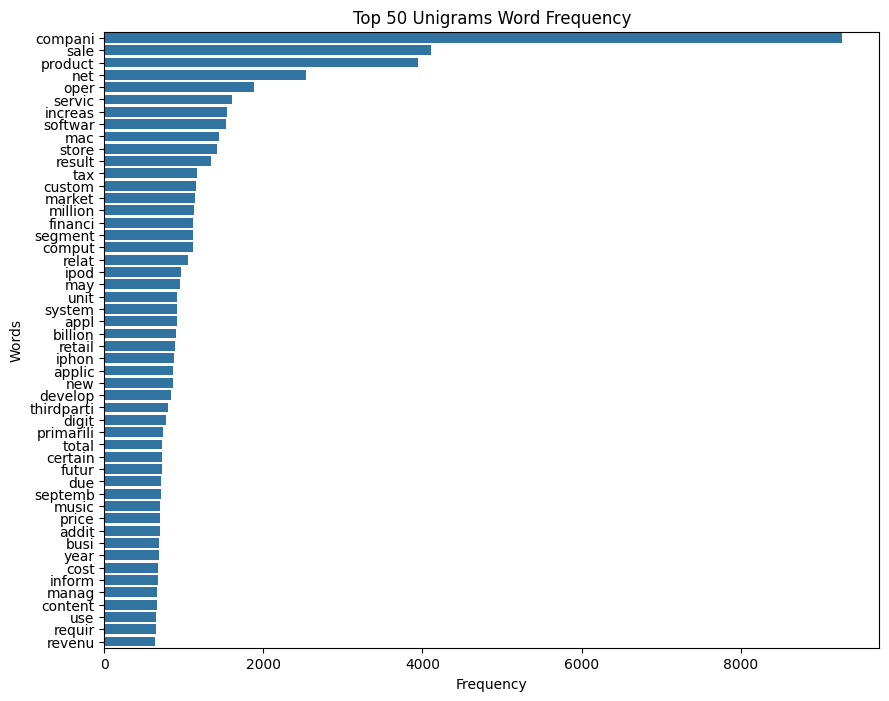

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=unigram_freq.values[:50], y=unigram_freq.index[:50])
plt.title('Top 50 Unigrams Word Frequency')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

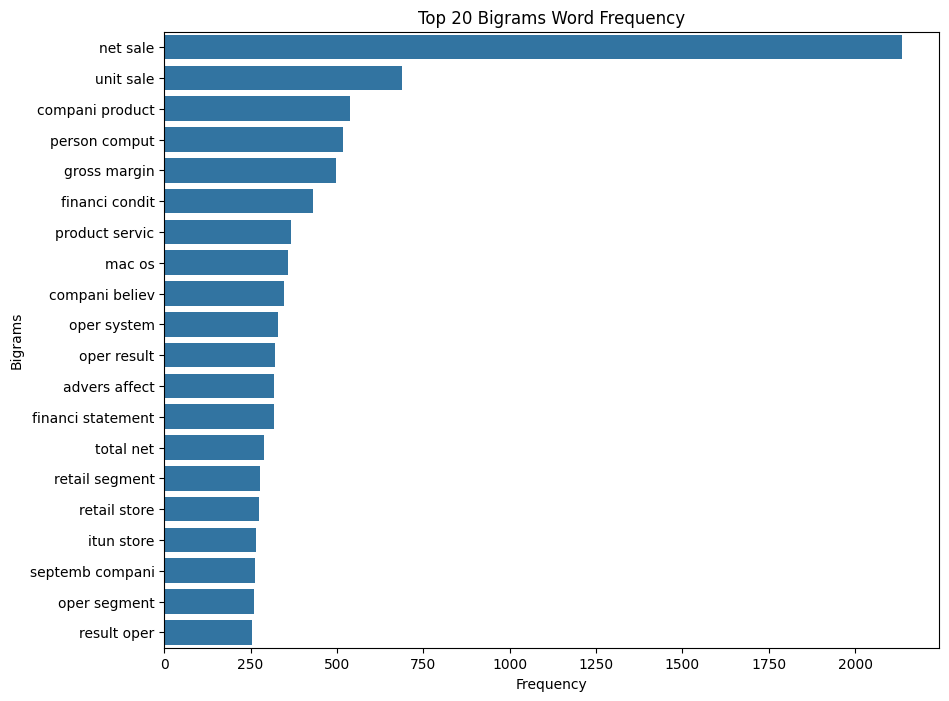

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=bigram_freq.values[:20], y=[" ".join(bigram) for bigram in bigram_freq.index[:20]])
plt.title('Top 20 Bigrams Word Frequency')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

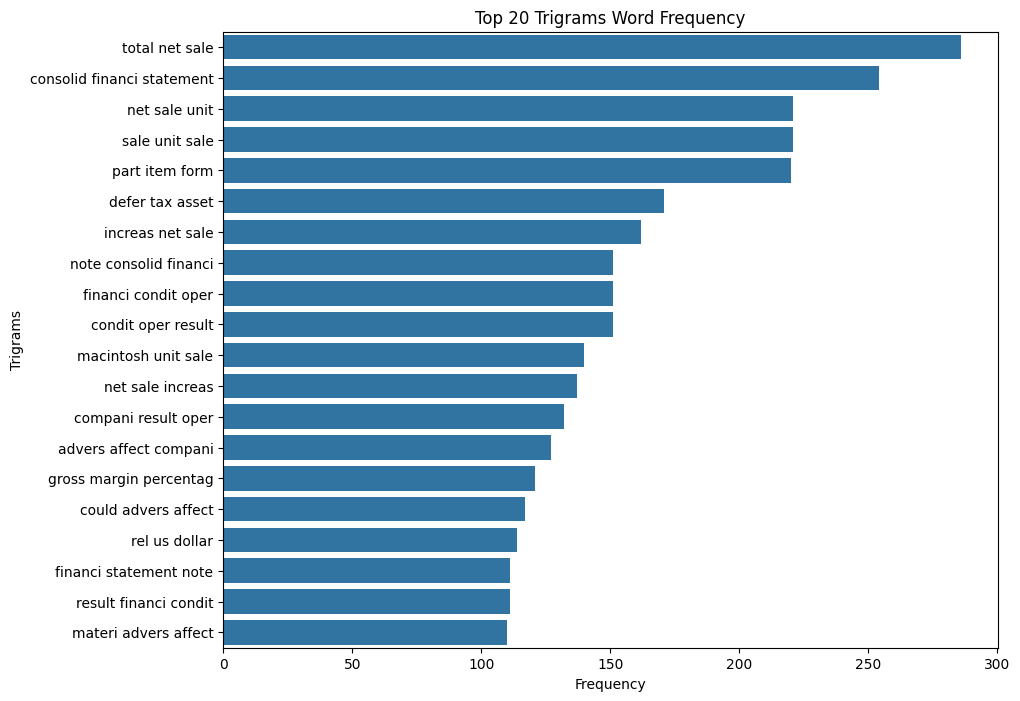

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=trigram_freq.values[:20], y=[" ".join(trigram) for trigram in trigram_freq.index[:20]])
plt.title('Top 20 Trigrams Word Frequency')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

In [ ]:
# Function to read text files and combine them into a single string
def combine_text_files(folder_path):
    combined_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith("_clean.txt"):
            with open(os.path.join(folder_path, file_name), 'r') as file:
                combined_text += file.read() + " "  # Add a space between texts to separate them
    return combined_text

# Combine the text from all files in the cleaned folder
entire_text = combine_text_files(cleaned_folder)

# Print the combined text (optional)
print(entire_text)

item business general apple computer incregistered trademark apple company incorporate laws state california january company principal executive offices locate infinite loop cupertino california telephone number company fiscal year end last saturday september unless otherwise state information present form k base company fiscal calendar company design manufacture market personal computers relate personal compute communicate solutions sale primarily education creative consumer business customers substantially company net sales date derive sale apple macintoshregistered trademark line personal computers relate software peripherals company manage business primarily geographic basis company geographic segment include americas europe japan asia pacific americas segment include north south america european segment include european countries well middle east africa japan segment include japan asia pacific segment include australia asia except japan geographic operate segment provide similar h

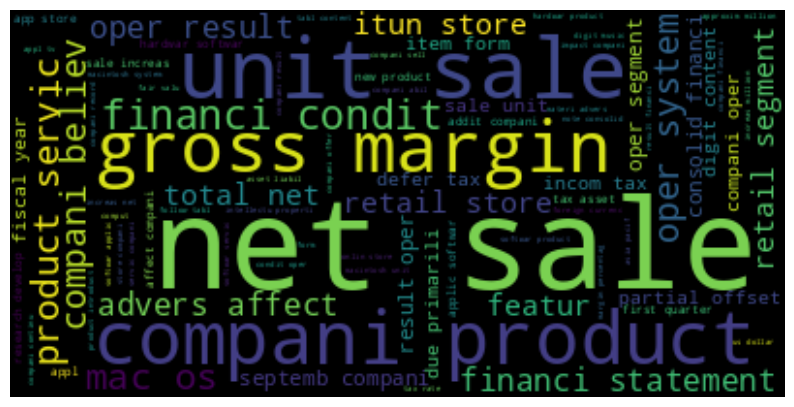

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=100, stopwords={'say', 'ha', 'wa', 'u', 'also', 'includ', 'compon', 'compar', 'k', 'x', 'inc', 'ii', 'person', 'inc'}).generate(entire_text)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

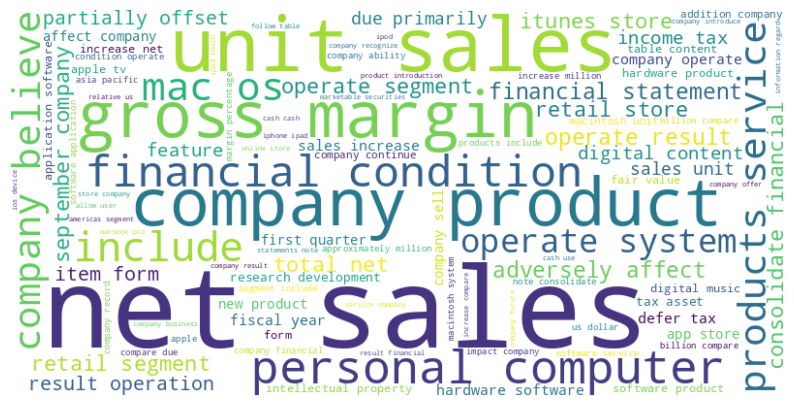

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100,
               stopwords={'say', 'ha', 'wa', 'u', 'also', 'includ', 'compon', 'compar', 'k', 'x', 'inc', 'ii', 'person', 'inc', 'b', 'q'}, contour_color='steelblue', contour_width=2)

wordcloud = wc.generate(entire_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Q.4) Document Term Matrix (DTM) and Sentiment Indicator

In [ ]:
positive_keywords = ['increas', 'effici', 'growth', 'innov', 'expans', 'develop', 'improv', 'success', 'invest']
negative_keywords = ['loss', 'risk', 'declin', 'litig', 'impair', 'volatil', 'default', 'obsolesc', 'challeng']
# Above keywords match more with stemmed text than lemmatized text since the latter one has good accuracy. So using cleaned
# stemmed data below for the frequency count and plotting

cleaned_folder = "/content/drive/MyDrive/AppleData_cleaned_stem"

positive_counts = []
negative_counts = []
years = []

def extract_phrases(text, keywords):
    phrases = []
    for keyword in keywords:
        if keyword in text:
            phrases.append(keyword)
    return phrases

for file_name in os.listdir(cleaned_folder):
    if file_name.endswith("_clean.txt"):
        year = int(file_name.split("_")[-2])
        years.append(year)

        with open(os.path.join(cleaned_folder, file_name), 'r') as file:
            text = file.read()

        positive_phrases = extract_phrases(text, positive_keywords)
        negative_phrases = extract_phrases(text, negative_keywords)

        positive_count = len(positive_phrases)
        negative_count = len(negative_phrases)

        positive_counts.append(positive_count)
        negative_counts.append(negative_count)

data_freq = {'Year': years, 'Positive_Counts': positive_counts, 'Negative_Counts': negative_counts}
df = pd.DataFrame(data_freq)
df_sorted = df.sort_values('Year', ascending=True)
df_sorted = df_sorted.reset_index(level=None, drop=True, inplace=False)

In [ ]:
df_sorted['Sentiment_Index'] = df_sorted['Positive_Counts'] / df_sorted['Negative_Counts']
print(df_sorted)

    Year  Positive_Counts  Negative_Counts  Sentiment_Index
0   2000                9                9         1.000000
1   2002                9                8         1.125000
2   2003                9                8         1.125000
3   2004                9                9         1.000000
4   2005                9                9         1.000000
5   2006                9                9         1.000000
6   2007                9                6         1.500000
7   2008                9                6         1.500000
8   2009                9                7         1.285714
9   2010                8                6         1.333333
10  2011                8                5         1.600000
11  2012                8                6         1.333333
12  2013                8                6         1.333333
13  2014                9                6         1.500000
14  2015                7                6         1.166667
15  2016                7               

In [ ]:
print(positive_phrases, negative_phrases)

['increas', 'effici', 'growth', 'innov', 'expans', 'develop', 'improv', 'success', 'invest'] ['loss', 'risk', 'declin', 'litig', 'impair', 'volatil', 'default', 'obsolesc']


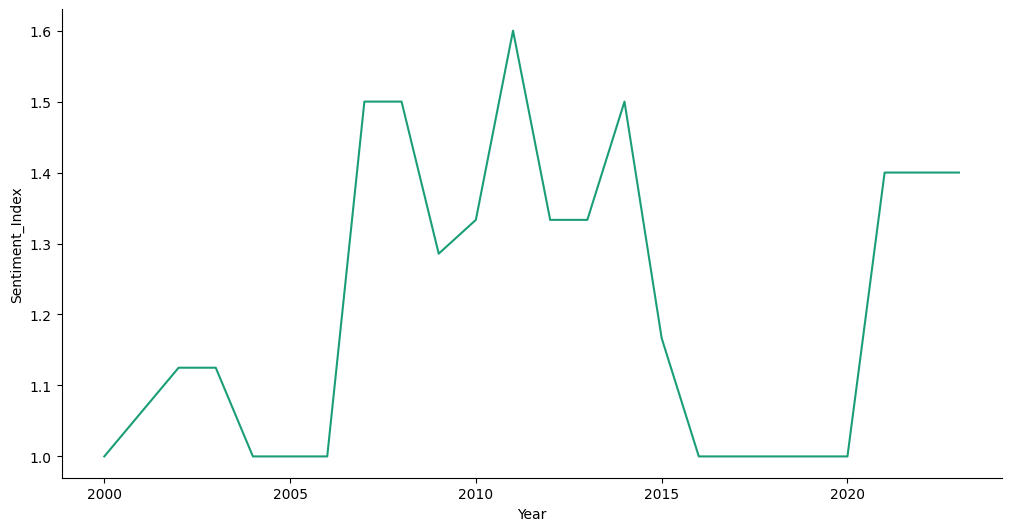

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Sentiment_Index']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Sentiment_Index')

Q.5) Predictive Ordinary Least Sqs Regression

In [ ]:
df_reg_new = pd.DataFrame()
df_reg_new['sentiment_index'] = df_sorted['Sentiment_Index']
print(df_reg_new)

    sentiment_index
0          1.000000
1          1.125000
2          1.125000
3          1.000000
4          1.000000
5          1.000000
6          1.500000
7          1.500000
8          1.285714
9          1.333333
10         1.600000
11         1.333333
12         1.333333
13         1.500000
14         1.166667
15         1.000000
16         1.000000
17         1.000000
18         1.000000
19         1.000000
20         1.400000
21         1.400000
22         1.400000


In [ ]:
data_new = pd.DataFrame()
data_new = data.copy()
data_new = data_new[data_new.fyear != 2001]
data_new = data_new.reset_index(level=None, drop=True, inplace=False)
print(data_new)

   ticker   datadate  fyear      at  asset_growth  log_asset_growth
0    AAPL 2000-09-30   2000    6803      0.318155          0.276233
1    AAPL 2002-09-30   2002    6298      0.046006          0.044979
2    AAPL 2003-09-30   2003    6815      0.082090          0.078894
3    AAPL 2004-09-30   2004    8050      0.181218          0.166546
4    AAPL 2005-09-30   2005   11551      0.434907          0.361100
5    AAPL 2006-09-30   2006   17205      0.489481          0.398428
6    AAPL 2007-09-30   2007   25347      0.473235          0.387460
7    AAPL 2008-09-30   2008   39572      0.561210          0.445461
8    AAPL 2009-09-30   2009   47501      0.200369          0.182629
9    AAPL 2010-09-30   2010   75183      0.582767          0.459174
10   AAPL 2011-09-30   2011  116371      0.547837          0.436858
11   AAPL 2012-09-30   2012  176064      0.512954          0.414064
12   AAPL 2013-09-30   2013  207000      0.175709          0.161871
13   AAPL 2014-09-30   2014  231839      0.11999

In [ ]:
df_reg_new['log_asset_growth'] = data_new['log_asset_growth'].copy()
df_reg_new['asset_growth'] = data_new['asset_growth'].copy()
print(df_reg_new)

    sentiment_index  log_asset_growth  asset_growth
0          1.000000          0.276233      0.318155
1          1.125000          0.044979      0.046006
2          1.125000          0.078894      0.082090
3          1.000000          0.166546      0.181218
4          1.000000          0.361100      0.434907
5          1.000000          0.398428      0.489481
6          1.500000          0.387460      0.473235
7          1.500000          0.445461      0.561210
8          1.285714          0.182629      0.200369
9          1.333333          0.459174      0.582767
10         1.600000          0.436858      0.547837
11         1.333333          0.414064      0.512954
12         1.333333          0.161871      0.175709
13         1.500000          0.113324      0.119995
14         1.166667          0.225488      0.252934
15         1.000000          0.102045      0.107433
16         1.000000          0.154200      0.166725
17         1.000000         -0.025895     -0.025562
18         1

In [ ]:
import statsmodels.api as sm

df_reg_new['NextYearLogAssetGrowth'] = df_reg_new['log_asset_growth'].shift(-1)
df_reg_new['NextYearAssetGrowth'] = df_reg_new['asset_growth'].shift(-1)

df_reg_new.dropna(inplace=True)

X = df_reg_new['sentiment_index']
X = sm.add_constant(X)
y = df_reg_new['NextYearLogAssetGrowth']
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

X = df_reg_new[['sentiment_index', 'asset_growth']]
X = sm.add_constant(X)
y = df_reg_new['NextYearAssetGrowth']
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                              OLS Regression Results                              
Dep. Variable:     NextYearLogAssetGrowth   R-squared:                       0.093
Model:                                OLS   Adj. R-squared:                  0.048
Method:                     Least Squares   F-statistic:                     2.056
Date:                    Mon, 13 May 2024   Prob (F-statistic):              0.167
Time:                            08:31:04   Log-Likelihood:                 8.3262
No. Observations:                      22   AIC:                            -12.65
Df Residuals:                          20   BIC:                            -10.47
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

In summary, based on these results, including the sentiment index as a predictor alongside this year's asset growth does not significantly improve the model's explanatory power. This year's asset growth is a statistically significant predictor of next year's asset growth, but the sentiment index is not.

Difficult to construct robust predictor based on text. The compnay reports don't add a significant value for the same

code below from HW-1

In [ ]:
from statsmodels.graphics.gofplots import qqplot

# Displays Diagnostic Plots of the Residuals
def residual_diagnostic(residuals, fitted, df, x_vars):

    plt.figure(figsize=(18, 7))
    plt.scatter(fitted, residuals, color=np.random.rand(3,))
    plt.title("Residuals Vs. Fitted", fontsize=18)
    plt.xlabel("Fitted", fontsize=15)
    plt.ylabel("Residuals", fontsize=15)
    plt.grid(True)
    plt.show()

    for x_var in x_vars:
        plt.figure(figsize=(18, 7))
        plt.scatter(df[x_var].values, residuals, color=np.random.rand(3,))
        plt.title("Residuals Vs. " + x_var, fontsize=18)
        plt.xlabel(x_var, fontsize=15)
        plt.ylabel("Residuals", fontsize=15)
        plt.grid(True)
        plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(19, 7))
    plt.subplots_adjust(wspace = 0.15, hspace = 0.3)
    h_max = 30

    ax[0].hist(residuals, bins = 60, color='cadetblue', ec='black')
    ax[0].set_title("Histogram", fontsize=15)
    ax[0].set_xlabel("Residuals", fontsize=15)

    qqplot(residuals, ax=ax[1], line='s', color='royalblue')
    ax[1].set_title('Normal Q-Q Plot', fontsize=15)
    ax[1].set_xlabel("Theoretical Quantiles", fontsize=15)
    ax[1].set_ylabel("Sample Quantiles", fontsize=15)

    plt.show()

In [ ]:
def fit_model(df, x_vars, y_var, plot_diagnostic=True):
    if len(x_vars) == 1:
        x = df[x_vars]
    else:
        x = df[x_vars]

    x = sm.add_constant(x)

    y = df[y_var]

    # Create the model
    model = sm.OLS(y, x)

    # Fit the model
    model_fit = model.fit()

    # Predict using the fitted model
    y_pred = model_fit.predict(x)

    print(model_fit.summary(), "\n")

    if plot_diagnostic == True:
        residuals = model_fit.resid
        residual_diagnostic(residuals, y_pred, df, x_vars)

                              OLS Regression Results                              
Dep. Variable:     NextYearLogAssetGrowth   R-squared:                       0.137
Model:                                OLS   Adj. R-squared:                  0.091
Method:                     Least Squares   F-statistic:                     3.007
Date:                    Mon, 13 May 2024   Prob (F-statistic):             0.0991
Time:                            08:59:45   Log-Likelihood:                 8.5583
No. Observations:                      21   AIC:                            -13.12
Df Residuals:                          19   BIC:                            -11.03
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

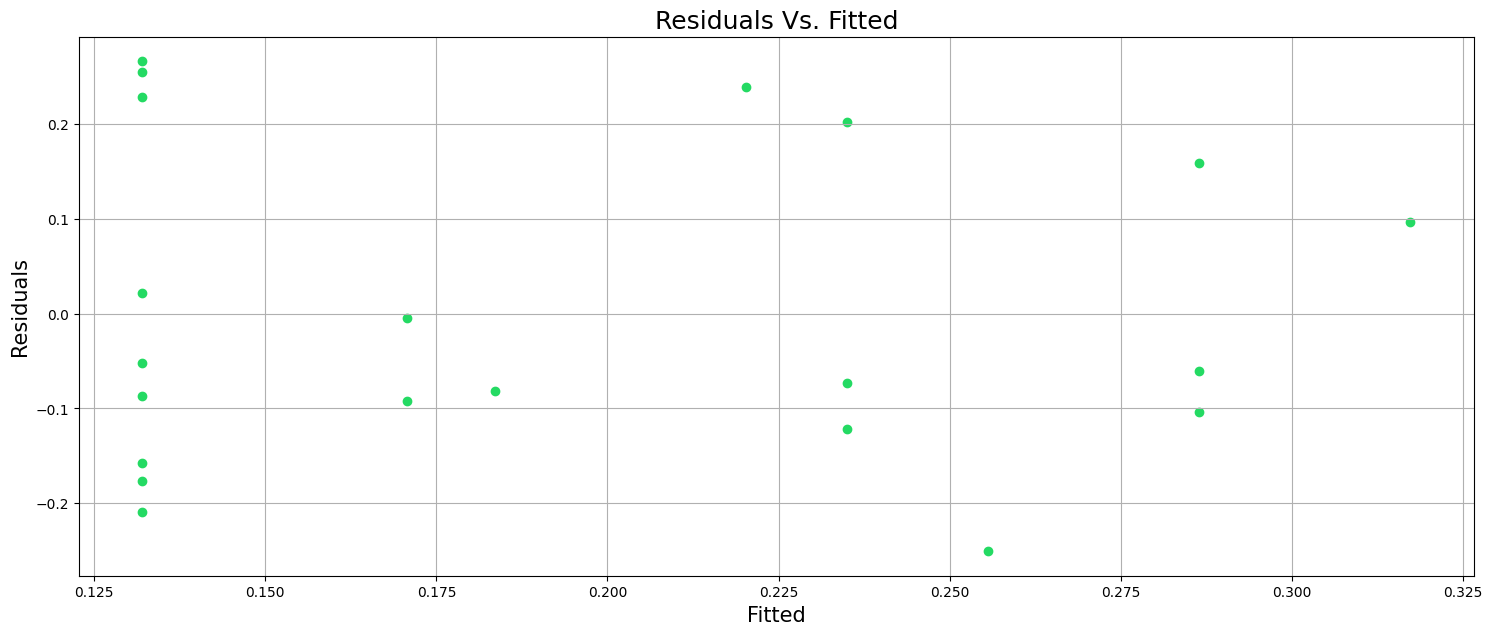

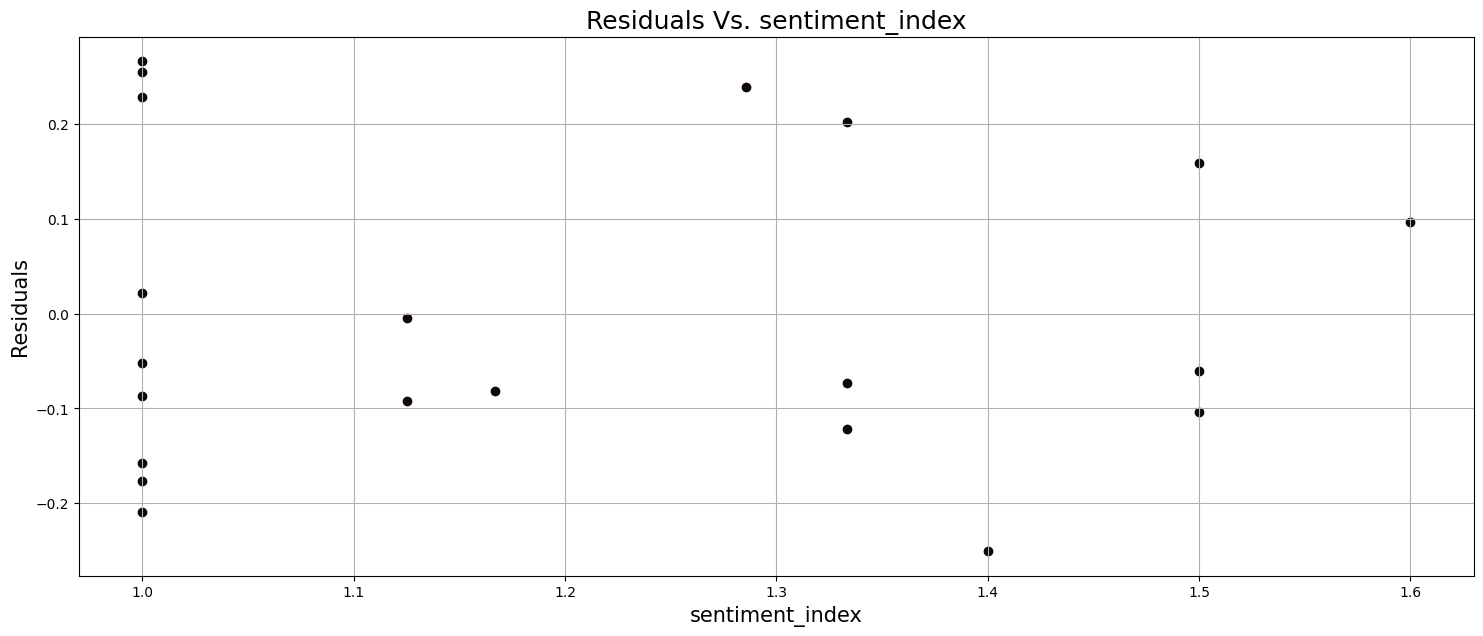

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


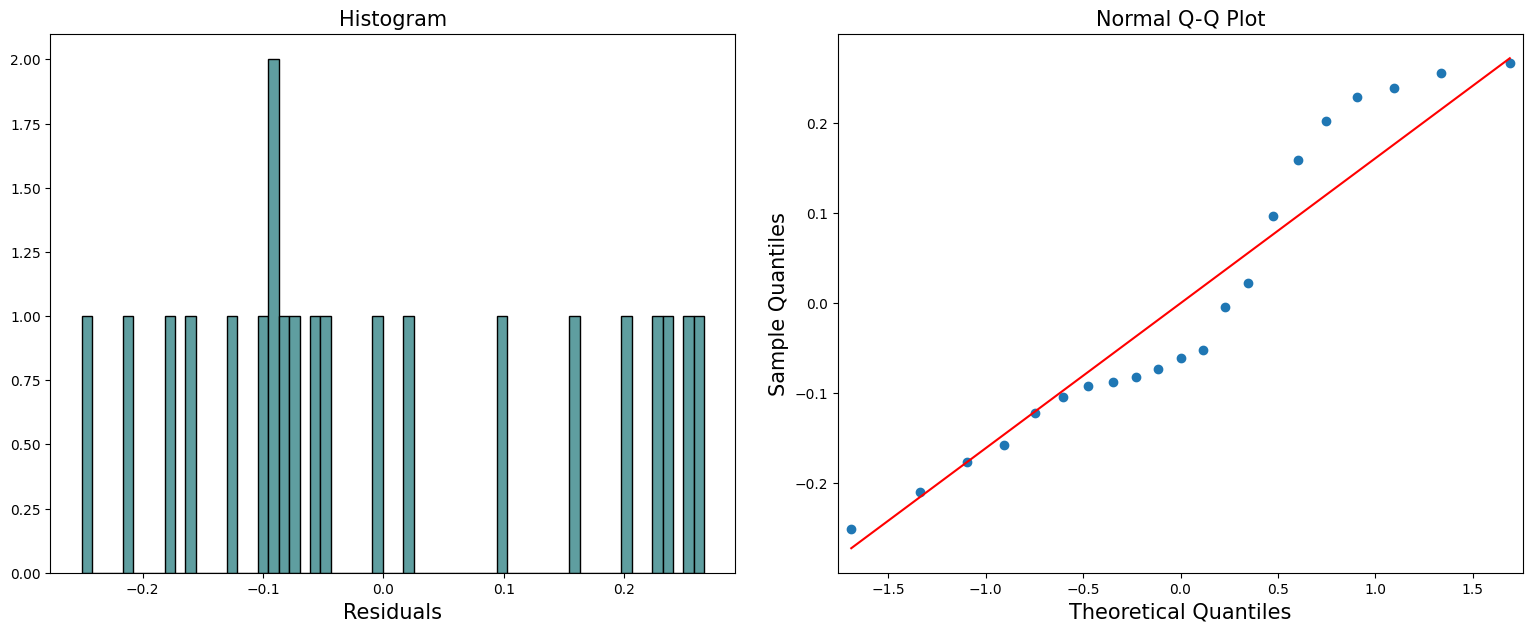

In [ ]:
df_reg_new['NextYearLogAssetGrowth'] = df_reg_new['log_asset_growth'].shift(-1)
df_reg_new['NextYearAssetGrowth'] = df_reg_new['asset_growth'].shift(-1)
df_reg_new.dropna(inplace=True)

fit_model(df_reg_new, ['sentiment_index'], 'NextYearLogAssetGrowth')

                             OLS Regression Results                            
Dep. Variable:     NextYearAssetGrowth   R-squared:                       0.435
Model:                             OLS   Adj. R-squared:                  0.372
Method:                  Least Squares   F-statistic:                     6.920
Date:                 Mon, 13 May 2024   Prob (F-statistic):            0.00590
Time:                         09:02:28   Log-Likelihood:                 8.3514
No. Observations:                   21   AIC:                            -10.70
Df Residuals:                       18   BIC:                            -7.569
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0007      

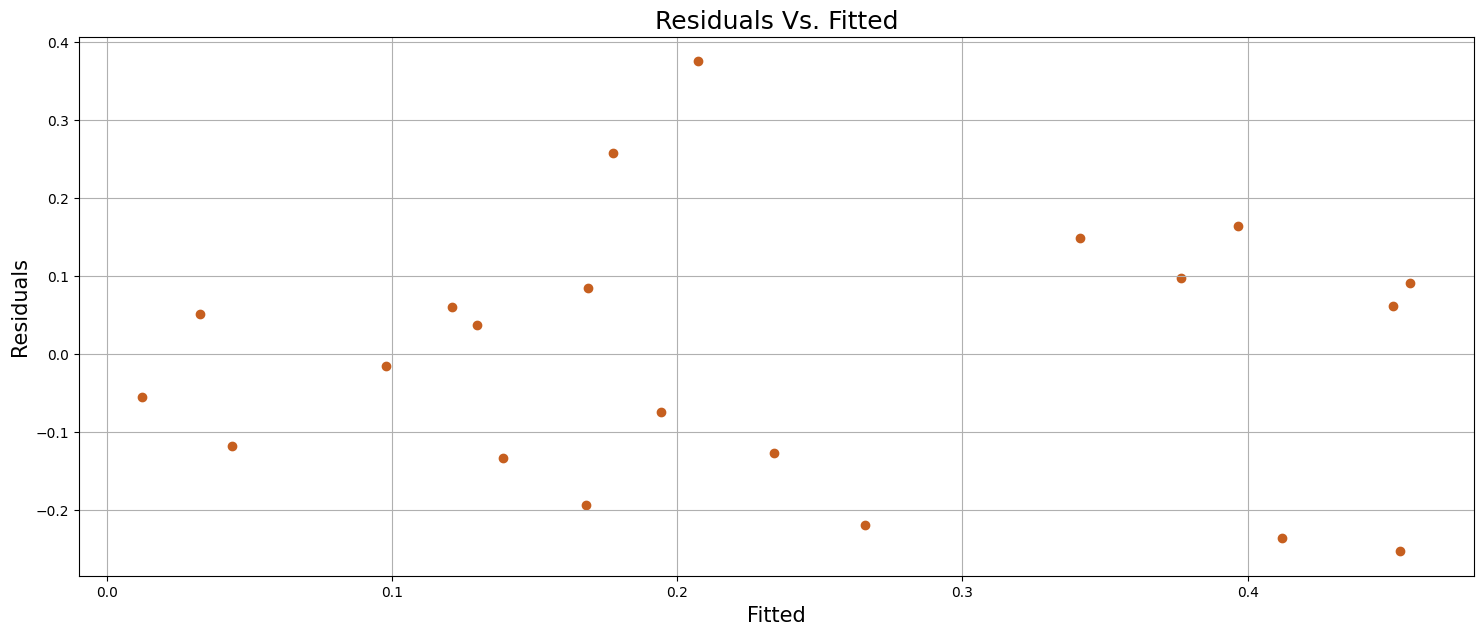

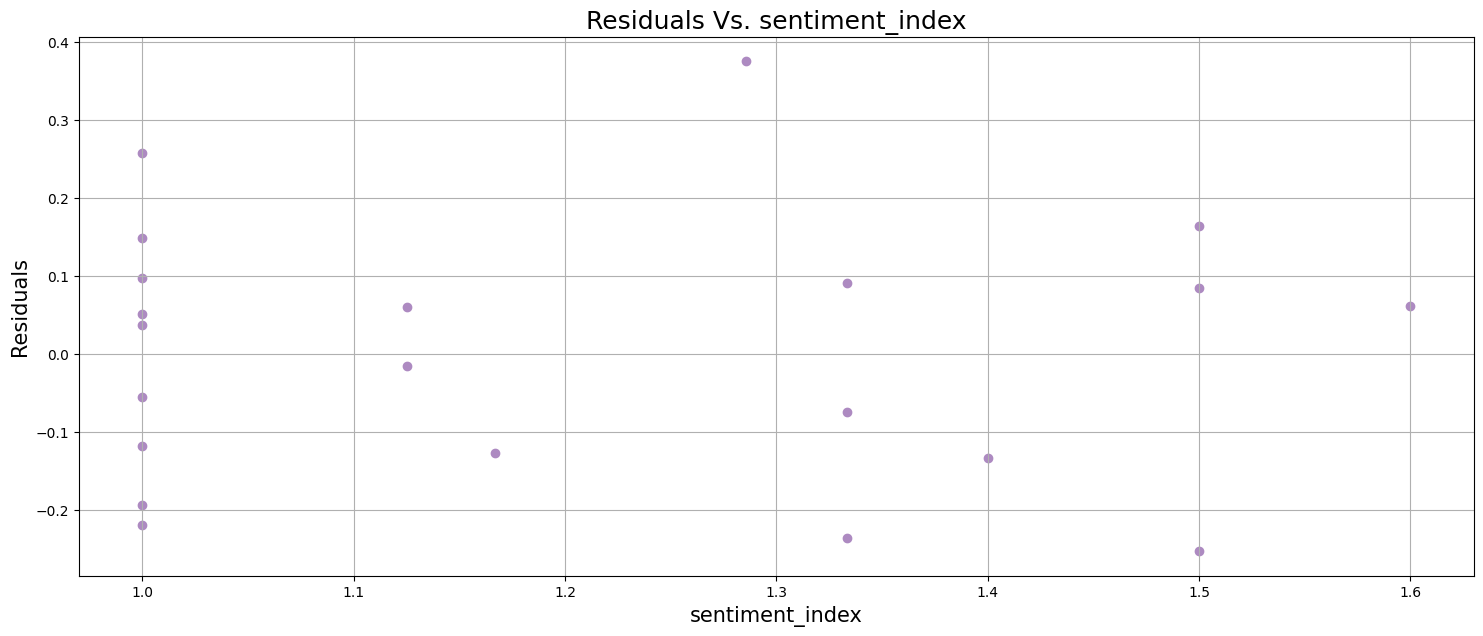

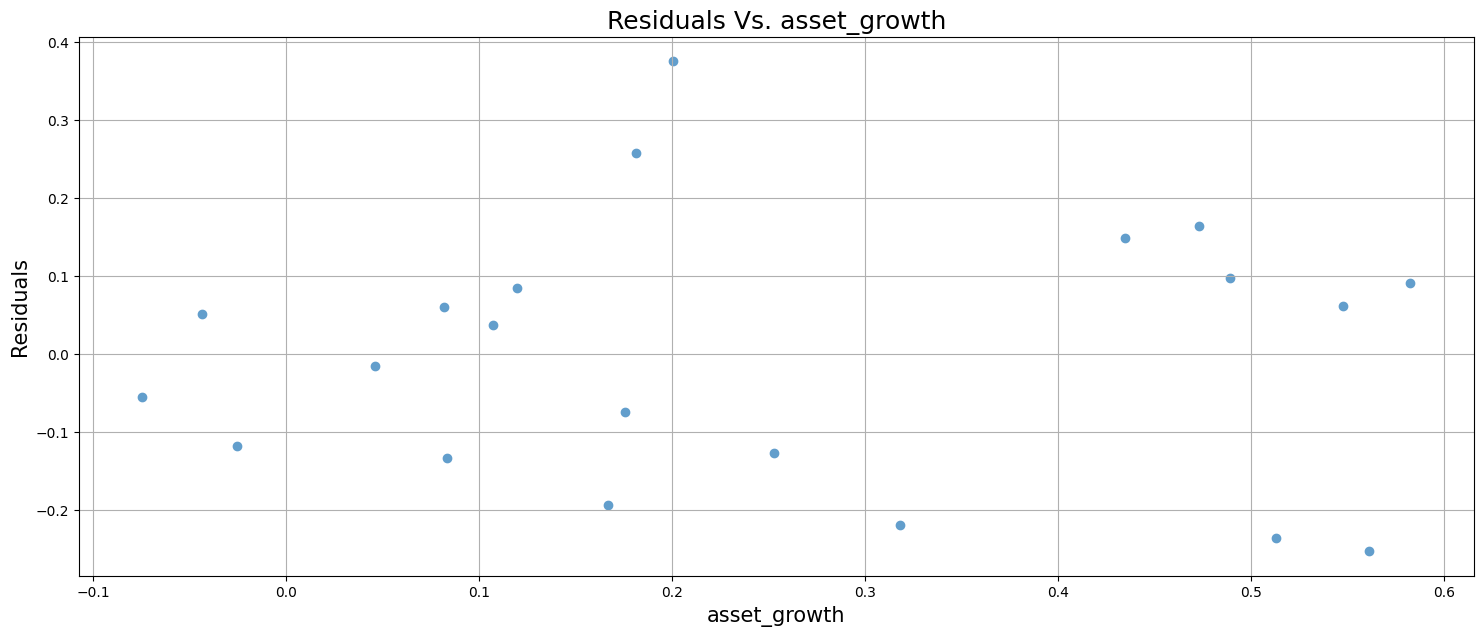

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


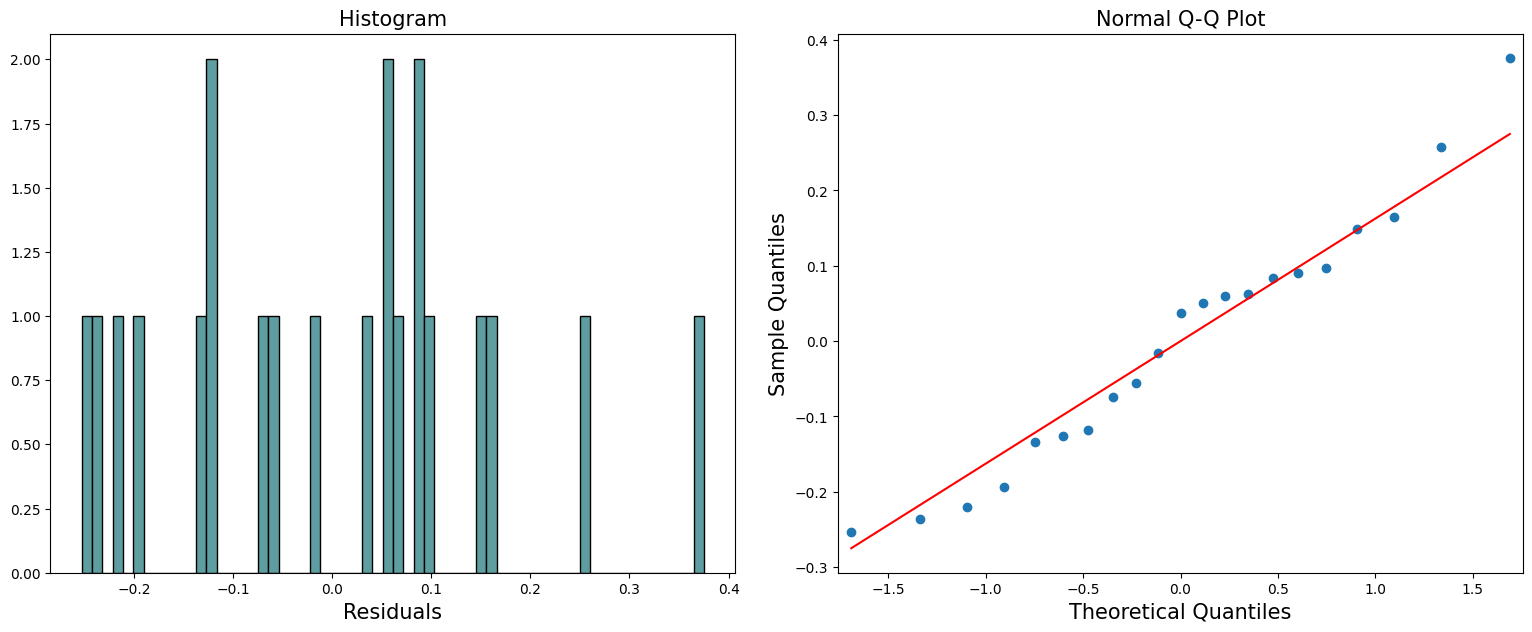

In [ ]:
fit_model(df_reg_new, ['sentiment_index', 'asset_growth'], 'NextYearAssetGrowth')